In [2]:
# import face_alignment

from exchange_dialogues_params import *
from exchange_dialogues_functions import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import time

In [51]:
# config = MovieTranslationConfig()
# fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, enable_cuda=True, flip_input=False, use_cnn_face_detector=False)

# Transform 3D face pose and project 2D landmarks

1. Read 2 images
2. Read their landmarks
3. Plot the images and their landmarks
4. Transform the landmarks of one image to match the pose of the other image's face
5. Plot new landmarks

## 1. Read 2 images

In [3]:
im0 = cv2.cvtColor(cv2.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu_2D_dlib/Mahesh_Babu_0000/Mahesh_Babu_0000_frame_025.png'), cv2.COLOR_BGR2RGB)

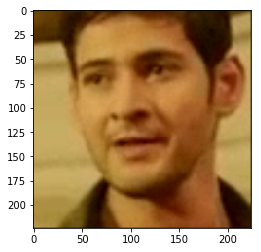

In [4]:
plt.imshow(im0)

In [5]:
im1 = cv2.cvtColor(cv2.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu_2D_dlib/Mahesh_Babu_0000/Mahesh_Babu_0000_frame_035.png'), cv2.COLOR_BGR2RGB)

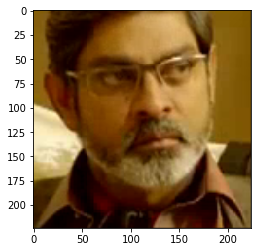

In [6]:
plt.imshow(im1)

## 2. Read their landmarks

In [7]:
# Read landmarks
telugu_Mahesh_Babu_2D_landmarks = utils.read_landmarks('telugu', 'Mahesh_Babu', 0, '2D_dlib')
telugu_Mahesh_Babu_3D_landmarks = utils.read_landmarks('telugu', 'Mahesh_Babu', 0, '3D')

# 2D landmarks
lm0_2D = np.array(telugu_Mahesh_Babu_2D_landmarks[25][1:])
lm1_2D = np.array(telugu_Mahesh_Babu_2D_landmarks[35][1:])

# 3D landmarks
lm0_3D = np.array(telugu_Mahesh_Babu_3D_landmarks[25][1:])
lm1_3D = np.array(telugu_Mahesh_Babu_3D_landmarks[35][1:])

In [9]:
print(lm0_3D.shape, lm1_3D.shape)

(68, 3) (68, 3)


## 3. Plot the images and their landmarks

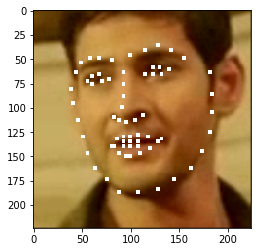

In [10]:
utils.plot_2D_landmarks(im0, lm0_2D)

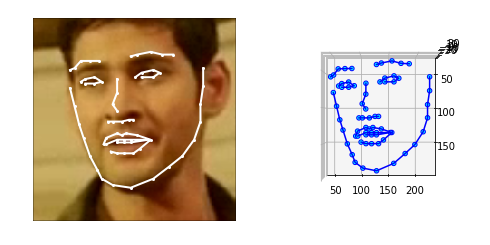

In [12]:
utils.plot_3D_landmarks(im0, lm0_3D)

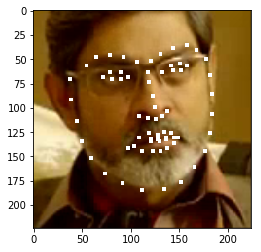

In [13]:
utils.plot_2D_landmarks(im1, lm1_2D)

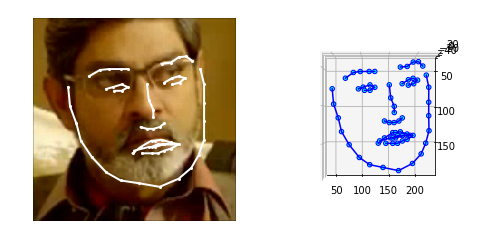

In [14]:
utils.plot_3D_landmarks(im1, lm1_3D)

# Using Homography

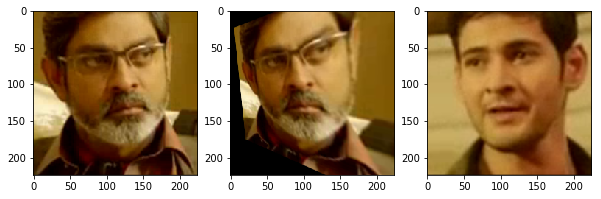

In [12]:
src_img = im1
src_points = lm1[:36, :2]
dst_img = im0
dst_points = lm0[:36, :2]
h, status = cv2.findHomography(src_points, dst_points)
warped_img_1_to_0 = cv2.warpPerspective(src_img, h, (224, 224))

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(src_img)
plt.subplot(132)
plt.imshow(warped_img_1_to_0)
plt.subplot(133)
plt.imshow(dst_img)

In [13]:
lm_w_1_to_0 = np.round(fa.get_landmarks(warped_img_1_to_0)[0]).astype('int')

NameError: name 'fa' is not defined

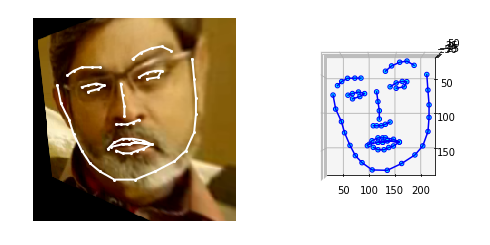

In [65]:
plot_3D_landmarks(warped_img_1_to_0, lm_w_1_to_0)

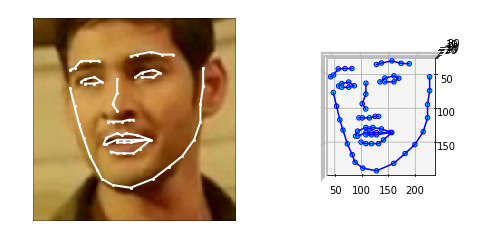

In [66]:
plot_3D_landmarks(im0, lm0)

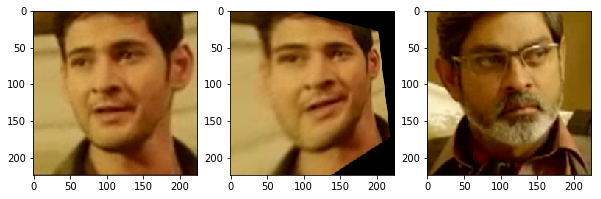

In [26]:
src_points = lm0[:36, :]
dst_points = lm1[:36, :]
src_img = im0
dst_img = im1
h, status = cv2.findHomography(src_points, dst_points)
warped_img_0_to_1 = cv2.warpPerspective(src_img, h, (224, 224))

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(src_img)
plt.subplot(132)
plt.imshow(warped_img_0_to_1)
plt.subplot(133)
plt.imshow(dst_img)

In [69]:
lm_w_0_to_1 = np.round(fa.get_landmarks(warped_img_0_to_1)[0]).astype('int')

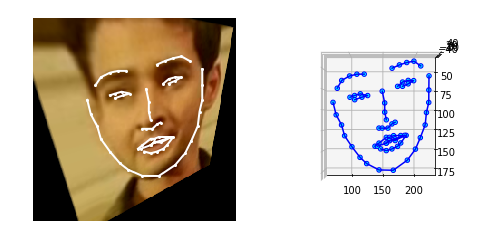

In [70]:
plot_3D_landmarks(warped_img_0_to_1, lm_w_0_to_1)

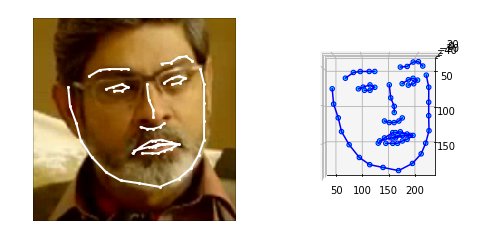

In [71]:
plot_3D_landmarks(im1, lm1)

# Using estimateAffine3D

## 1-> 2

In [125]:
retval, out, inliers = cv2.estimateAffine3D(lm0[:36], lm1[:36])

In [126]:
retval

1

In [127]:
out

array([[ 9.79946273e-01,  6.12415177e-02,  1.01949427e+00,
         1.85078300e+01],
       [-2.45294030e-02,  1.02103760e+00,  1.94600252e-01,
         4.51198256e+00],
       [-2.00580680e-01, -8.66438703e-03,  1.32918401e+00,
         2.20837284e+01]])

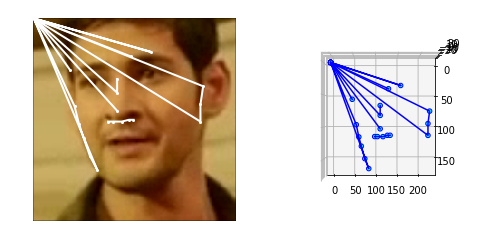

In [142]:
new_lm = np.array([lm0[i] if inliers[i] else (0, 0, 0) for i in range(len(inliers))])
plot_3D_landmarks(im0, new_lm)

In [146]:
new_lm0 = np.dot(out, np.hstack((lm0, np.ones((len(lm0), 1)))).T).T

In [147]:
new_lm0.shape

(68, 3)

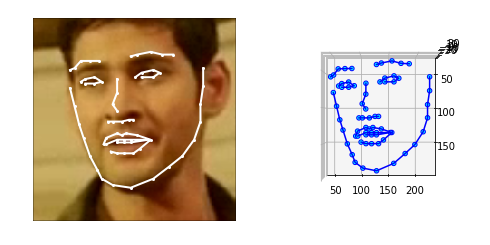

In [149]:
plot_3D_landmarks(im0, lm0)

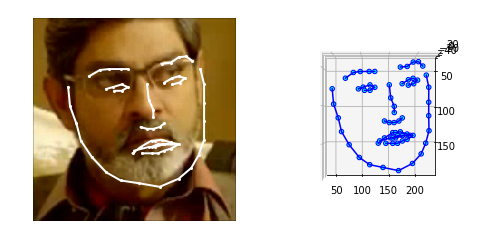

In [174]:
plot_3D_landmarks(im1, lm1)

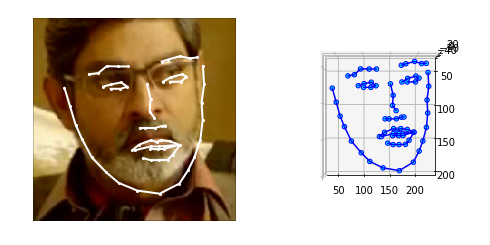

In [148]:
plot_3D_landmarks(im1, new_lm0)

## 2 -> 1

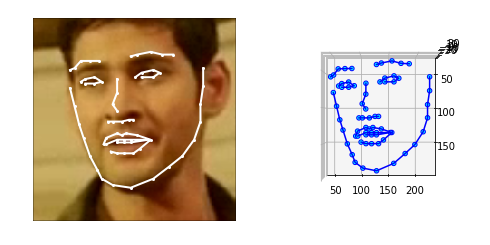

In [175]:
plot_3D_landmarks(im0, lm0)

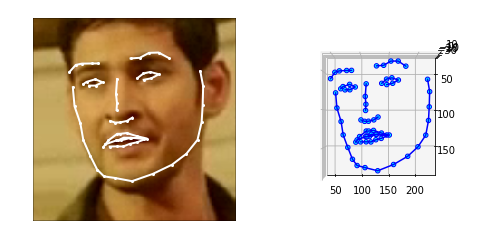

In [172]:
retval, out, inliers = cv2.estimateAffine3D(lm1[:36], lm0[:36])
new_lm1 = np.dot(out, np.hstack((lm1, np.ones((len(lm1), 1)))).T).T
plot_3D_landmarks(im0, new_lm1)

# Testing new landmarks

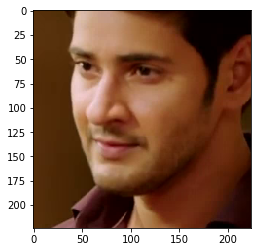

In [3]:
image = cv2.cvtColor(cv2.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu_2D_dlib/Mahesh_Babu_0179/Mahesh_Babu_0179_frame_000.png'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
telugu_Mahesh_Babu_2D_landmarks = read_landmarks('telugu', 'Mahesh_Babu', 179, '2D_dlib')
telugu_Mahesh_Babu_3D_landmarks = read_landmarks('telugu', 'Mahesh_Babu', 179, '3D')

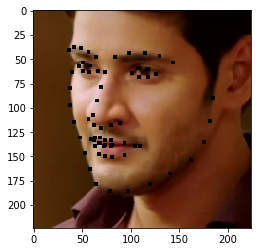

In [5]:
# 2D landmarks
lm_2D = np.array(telugu_Mahesh_Babu_2D_landmarks[0][1:])
plot_lip_landmarks(lm_2D, image)

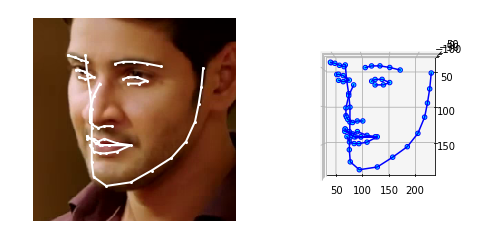

In [6]:
# 3D landmarks
lm_3D = np.array(telugu_Mahesh_Babu_3D_landmarks[0][1:])
plot_3D_landmarks(image, lm_3D)

In [7]:
lm = np.hstack((lm_2D, lm_3D[:, 2].reshape(68, 1)))

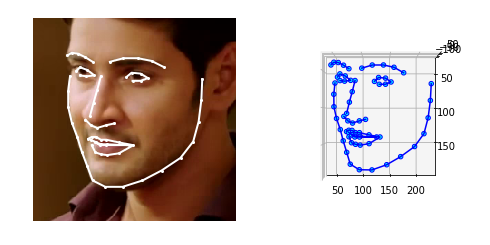

In [8]:
plot_3D_landmarks(image, lm)

## exchange_dialogues

In [76]:
from exchange_dialogues_functions import *

verbose = True
debug = True

video1_language="telugu"
video1_actor="Mahesh_Babu"
video1_number=179
video2_language="telugu"
video2_actor="Mahesh_Babu"
video2_number=182

video1_frames_dir = get_video_frames_dir(video1_language, video1_actor, video1_number)
    
# Read 2D landmarks detected using dlib (dlib.net)
video1_2D_landmarks = read_landmarks(video1_language, video1_actor, video1_number, '2D_dlib')

# Read 3D landmarks detected using face_alignment trained on LS3D-W (https://github.com/1adrianb/face-alignment)
video1_3D_landmarks = read_landmarks(video1_language, video1_actor, video1_number, '3D')

video1_length = len(video1_2D_landmarks)

# Video 2
video2_frames_dir = get_video_frames_dir(video2_language, video2_actor, video2_number)

# Read 2D landmarks detected using dlib (dlib.net)
video2_2D_landmarks = read_landmarks(video2_language, video2_actor, video2_number, '2D_dlib')

# Read 3D landmarks detected using face_alignment trained on LS3D-W (https://github.com/1adrianb/face-alignment)
video2_3D_landmarks = read_landmarks(video2_language, video2_actor, video2_number, '3D')

video2_length = len(video2_2D_landmarks)

# Choose the smaller one as the target length, and choose those many central frames
if verbose:
    print("Choosing smaller video")

if video1_length < video2_length:
    if verbose:
        print("    - video1 chosen")
    video_length = video1_length
    video1_frame_numbers = np.arange(video_length)
    video2_frame_numbers = np.arange((video2_length//2 - video_length//2), (video2_length//2 - video_length//2 + video_length))
    video2_2D_landmarks = video2_2D_landmarks[(video2_length//2 - video_length//2):(video2_length//2 - video_length//2 + video_length)]
    video2_3D_landmarks = video2_3D_landmarks[(video2_length//2 - video_length//2):(video2_length//2 - video_length//2 + video_length)]
else:
    if verbose:
        print("    - video2 chosen")
    video_length = video2_length
    video2_frame_numbers = np.arange(video_length)
    video1_frame_numbers = np.arange((video1_length//2 - video_length//2), (video1_length//2 - video_length//2 + video_length))
    video1_2D_landmarks = video1_2D_landmarks[(video1_length//2 - video_length//2):(video1_length//2 - video_length//2 + video_length)]
    video1_3D_landmarks = video1_3D_landmarks[(video1_length//2 - video_length//2):(video1_length//2 - video_length//2 + video_length)]

# EXCHANGE DIALOGUES
video1_frames_with_black_mouth_and_video2_lip_polygons = []
video2_frames_with_black_mouth_and_video1_lip_polygons = []

process_video2 = True

Choosing smaller video
    - video2 chosen


### Orig 2D landmarks

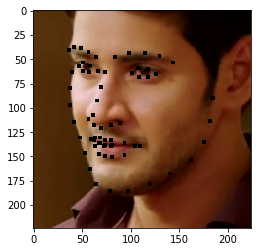

In [65]:
plot_2D_landmarks(video1_frame, video1_2D_landmarks[0][1:])

### Orig 3D landmarks

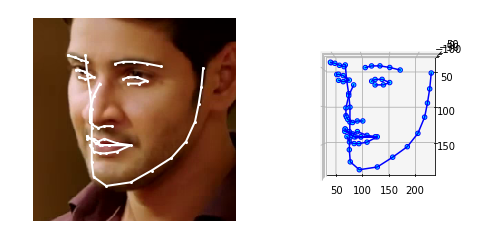

In [66]:
plot_3D_landmarks(video1_frame, np.array(video1_3D_landmarks[0][1:]))

### (x, y, z) == (2D, 2D, 3D) landmarks

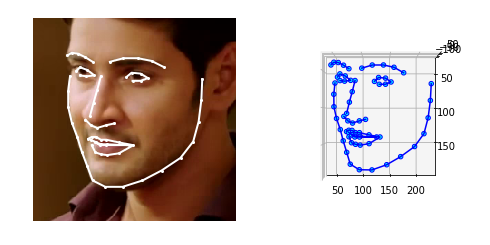

In [67]:
plot_3D_landmarks(video1_frame, video1_frame_3D_landmarks)

### (2D, 2D, 3D) landmarks rotated

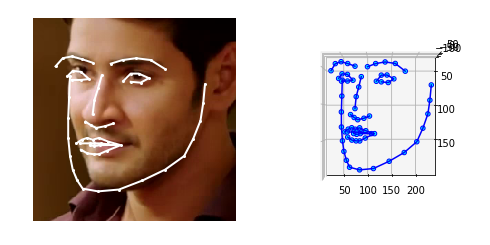

In [68]:
plot_3D_landmarks(video1_frame, video2_3D_landmarks_tx_to_1)

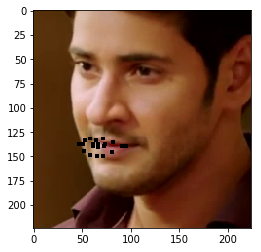

In [71]:
plot_2D_landmarks(video1_frame, video2_3D_landmarks_tx_to_1[48:68, :2])

### Visualize rotation...

In [69]:
video1_orig_3D_landmarks_tx_to_2, video2_orig_3D_landmarks_tx_to_1 = exchange_3D_landmarks_using_3D_affine_tx(np.array(video1_3D_landmarks[0][1:]), np.array(video2_3D_landmarks[0][1:]),
                                                                                                        process_video2=process_video2, verbose=verbose)

Affine 3D Tx 1 -> 2
Affine 3D Tx 2 -> 1


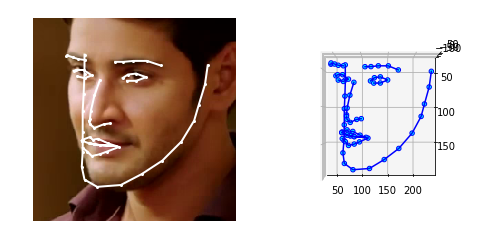

In [70]:
plot_3D_landmarks(video1_frame, np.array(video2_orig_3D_landmarks_tx_to_1))

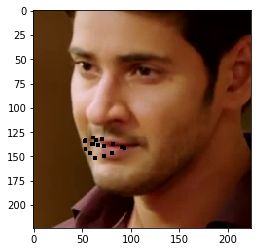

In [72]:
plot_2D_landmarks(video1_frame, video2_orig_3D_landmarks_tx_to_1[48:68, :2])

### Checking lm generation 

In [77]:
video1_frame_2D_landmarks = np.array(video1_2D_landmarks[0][1:])
video1_frame_3D_landmarks = np.array(video1_3D_landmarks[0][1:])
video2_frame_2D_landmarks = np.array(video2_2D_landmarks[0][1:])
video2_frame_3D_landmarks = np.array(video2_3D_landmarks[0][1:])

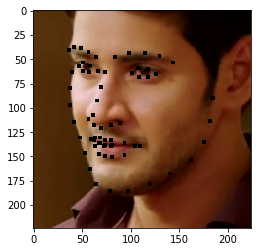

In [79]:
plot_2D_landmarks(video1_frame, video1_frame_2D_landmarks)

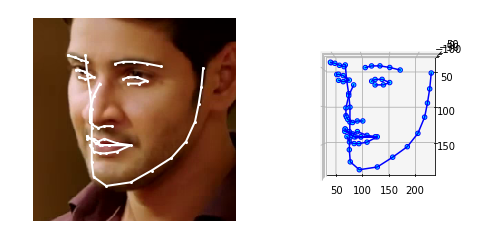

In [80]:
plot_3D_landmarks(video1_frame, video1_frame_3D_landmarks)

In [84]:
source_frame_2D_landmarks = video2_frame_2D_landmarks
target_frame_2D_landmarks = video1_frame_2D_landmarks
source_frame_3D_landmarks = video2_frame_3D_landmarks
target_frame_3D_landmarks = video1_frame_3D_landmarks

In [85]:
retval, Rt_to_dst_from_src, _ = cv2.estimateAffine3D(source_frame_3D_landmarks[:36], target_frame_3D_landmarks[:36])

In [86]:
Rt_to_dst_from_src

array([[ 7.65581848e-01, -3.03632826e-01, -6.46789664e-01,
         1.77066381e+01],
       [ 1.79842530e-01,  1.04646051e+00, -6.01241071e-02,
        -2.91140625e+01],
       [ 8.76794980e-01, -2.11685469e-01,  1.05997913e+00,
        -9.44613494e+01]])

In [87]:
# 3D rotate the 2D lip landmarks (because 2D lip landmarks are more stable than 3D)
# - Attach the z coordinate of 3D landmarks to 2D landmarks, and add homogeneous coordinate
source_frame_combo_3D_lip_landmarks = np.hstack(( np.array(source_frame_2D_landmarks)[48:68, :2],
                                                  np.array(source_frame_3D_landmarks)[48:68, 2].reshape(20, 1),
                                                  np.ones((20, 1)) ))
# - Rotate
target_lip_landmarks_tx_from_source = np.dot( Rt_to_dst_from_src, source_frame_combo_3D_lip_landmarks.T ).T.astype('int')

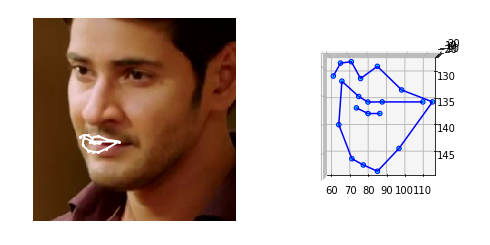

In [88]:
plot_3D_landmarks(video1_frame, target_lip_landmarks_tx_from_source)

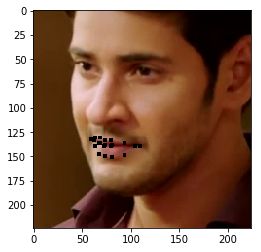

In [95]:
plot_2D_landmarks(video1_frame, target_frame_2D_landmarks[48:68])

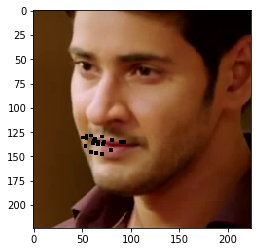

In [99]:
plot_2D_landmarks(video1_frame, target_lip_landmarks_tx_from_source[:, :2])

In [96]:
# Normalize, un-normalize to match position of target mouth
_, target_lip_landmarks_ur, target_lip_landmarks_uc, \
    target_lip_landmarks_sr, target_lip_landmarks_sc = normalize_lip_landmarks(target_frame_2D_landmarks[48:68])

In [97]:
print(target_lip_landmarks_ur,target_lip_landmarks_uc, \
    target_lip_landmarks_sr,target_lip_landmarks_sc)

60 133 50 20


In [98]:
new_target_lip_landmarks = np.round(unnormalize_lip_landmarks(normalize_lip_landmarks(target_lip_landmarks_tx_from_source[:, :2])[0],
                                                              target_lip_landmarks_ur, target_lip_landmarks_uc,
                                                              target_lip_landmarks_sr, target_lip_landmarks_sc)).astype(int)

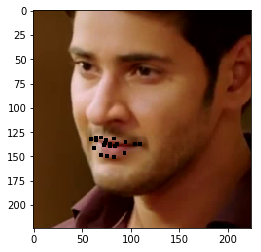

In [100]:
plot_2D_landmarks(video1_frame, new_target_lip_landmarks)

### Read affine tx'ed landmarks

In [97]:
new_lms = np.load('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/exchanged_videos/new_lip_landmarks.npz')

In [ ]:
new_lms_1 = new_lms['new_video1_lip_landmarks']

In [74]:
nlm21.shape

(96, 68, 3)

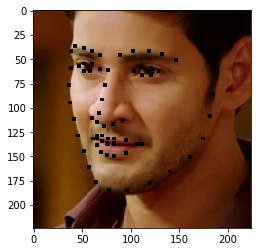

In [34]:
plot_lip_landmarks(nlm21[-1], image)

In [35]:
image.shape

(224, 224, 3)

### Do make_black_mouth_polygons

In [75]:
mouth_landmarks = nlm21[-1][48:68][:, :2]

In [76]:
mouth_landmarks

array([[ 62, 132],
       [ 66, 129],
       [ 71, 129],
       [ 77, 132],
       [ 83, 132],
       [ 96, 134],
       [112, 138],
       [ 96, 147],
       [ 83, 150],
       [ 76, 149],
       [ 70, 146],
       [ 66, 139],
       [ 66, 132],
       [ 71, 135],
       [ 76, 137],
       [ 83, 137],
       [107, 138],
       [ 83, 138],
       [ 77, 138],
       [ 71, 135]])

In [68]:
mouth_rect = [int(np.min(mouth_landmarks[:, 0])), int(np.min(mouth_landmarks[:, 1])), int(np.max(mouth_landmarks[:, 0])), int(np.max(mouth_landmarks[:, 1]))]
print(mouth_rect)

[62, 129, 112, 150]


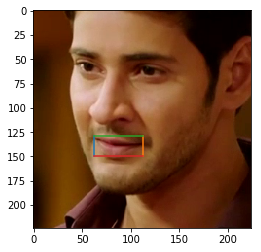

In [69]:
plt.imshow(image)
plt.plot([mouth_rect[0], mouth_rect[0]], [mouth_rect[1], mouth_rect[3]])
plt.plot([mouth_rect[2], mouth_rect[2]], [mouth_rect[1], mouth_rect[3]])
plt.plot([mouth_rect[0], mouth_rect[2]], [mouth_rect[1], mouth_rect[1]])
plt.plot([mouth_rect[0], mouth_rect[2]], [mouth_rect[3], mouth_rect[3]])

In [55]:
mouth_rect_expanded = expand_rect(mouth_rect, scale_w=1.2, scale_h=1.8, frame_shape=(224, 224))

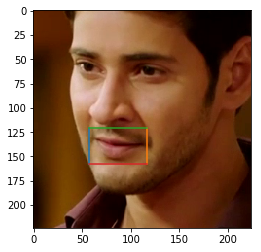

In [56]:
plt.imshow(image)
plt.plot([mouth_rect_expanded[0], mouth_rect_expanded[0]], [mouth_rect_expanded[1], mouth_rect_expanded[3]])
plt.plot([mouth_rect_expanded[2], mouth_rect_expanded[2]], [mouth_rect_expanded[1], mouth_rect_expanded[3]])
plt.plot([mouth_rect_expanded[0], mouth_rect_expanded[2]], [mouth_rect_expanded[1], mouth_rect_expanded[1]])
plt.plot([mouth_rect_expanded[0], mouth_rect_expanded[2]], [mouth_rect_expanded[3], mouth_rect_expanded[3]])

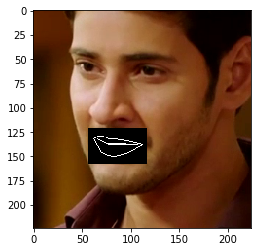

In [60]:
frame_with_blackened_mouth_and_lip_polygons = np.array(image)
frame_with_blackened_mouth_and_lip_polygons[mouth_rect_expanded[1]:mouth_rect_expanded[3],
                                            mouth_rect_expanded[0]:mouth_rect_expanded[2]] = 0

frame_with_blackened_mouth_and_lip_polygons = cv2.drawContours(frame_with_blackened_mouth_and_lip_polygons,
    [mouth_landmarks[:12], mouth_landmarks[12:]], -1, (255, 255, 255))

plt.imshow(frame_with_blackened_mouth_and_lip_polygons)

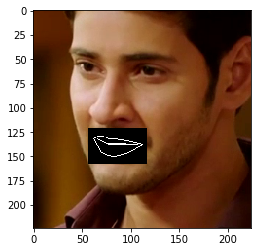

In [61]:
video1_frame_with_black_mouth_and_video2_lip_polygons = make_black_mouth_and_lips_polygons(image, mouth_landmarks)
plt.imshow(video1_frame_with_black_mouth_and_video2_lip_polygons)

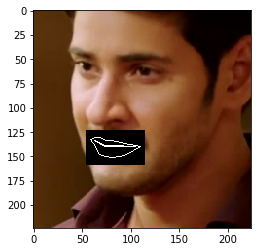

In [87]:
for i in range(len(nlm21)):
    im_name = "/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu_2D_dlib/Mahesh_Babu_0179/Mahesh_Babu_0179_frame_{0:03d}.png".format(i)
    image = cv2.cvtColor(cv2.imread(im_name), cv2.COLOR_BGR2RGB)
    mouth_landmarks = nlm21[i][48:68][:, :2]
    video1_frame_with_black_mouth_and_video2_lip_polygons = make_black_mouth_and_lips_polygons(image, mouth_landmarks)
    plt.imshow(video1_frame_with_black_mouth_and_video2_lip_polygons)
    break

### Read video

In [93]:
video_reader = imageio.get_reader('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/exchanged_videos/telugu_Mahesh_Babu_0179_with_audio_of_telugu_Mahesh_Babu_0182_black_mouth_polygons.mp4')

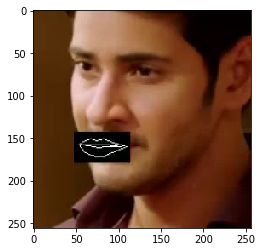

In [94]:
for frame in video_reader:
    plt.imshow(frame)
    break

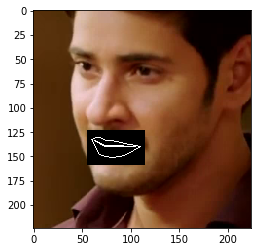

In [92]:
plt.imshow(video1_frame_with_black_mouth_and_video2_lip_polygons)

# EXCHANGE PIPELINE

In [22]:
im0 = cv2.cvtColor(cv2.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu_2D_dlib/Mahesh_Babu_0179/Mahesh_Babu_0179_frame_000.png'), cv2.COLOR_BGR2RGB)
im1 = cv2.cvtColor(cv2.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu_2D_dlib/Mahesh_Babu_0182/Mahesh_Babu_0182_frame_042.png'), cv2.COLOR_BGR2RGB)

(-0.5, 223.5, 223.5, -0.5)

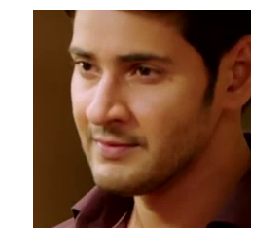

In [23]:
plt.imshow(im0)
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

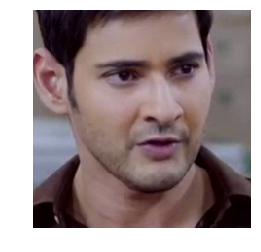

In [24]:
plt.imshow(im1)
plt.axis('off')

In [29]:
lm0_2D = np.array(utils.read_landmarks('telugu', 'Mahesh_Babu', 179, '2D_dlib')[0][1:])
lm0_3D = np.array(utils.read_landmarks('telugu', 'Mahesh_Babu', 179, '3D')[0][1:])
lm1_2D = np.array(utils.read_landmarks('telugu', 'Mahesh_Babu', 182, '2D_dlib')[42][1:])
lm1_3D = np.array(utils.read_landmarks('telugu', 'Mahesh_Babu', 182, '3D')[42][1:])

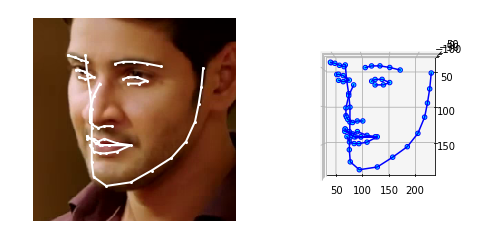

In [33]:
utils.plot_3D_landmarks(im0, lm0_3D)

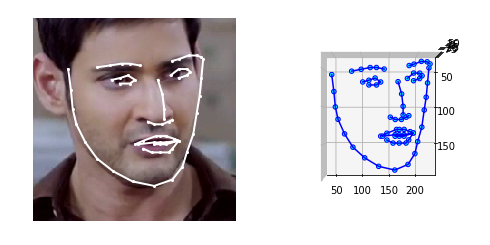

In [34]:
utils.plot_3D_landmarks(im1, lm1_3D)

In [83]:
# Using x, y from dlib and z from LS3D-W
r, Rt_1_from_0, _ = cv2.estimateAffine3D(lm0_3D[:36], lm1_3D[:36])
lm0_tx_to_1 = np.dot( Rt_1_from_0, np.hstack((lm0_2D, lm0_3D[:, 2].reshape(68, 1), np.ones((68, 1)))).T ).T.astype('int')
_, ux, uy, w = normalize_lip_landmarks(lm1_2D[48:68, :2])
lm0_tx_to_1_n = np.round(unnormalize_lip_landmarks(normalize_lip_landmarks(lm0_tx_to_1[48:68, :2])[0],
                                                   ux, uy, w)).astype(int)

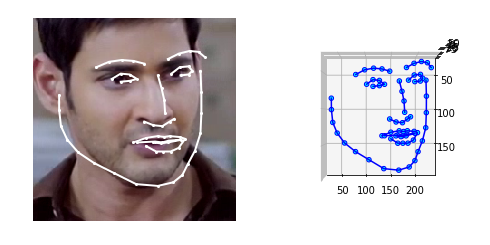

In [84]:
utils.plot_3D_landmarks(im1, lm0_tx_to_1)

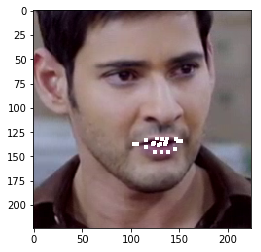

In [85]:
utils.plot_2D_landmarks(im1, lm0_tx_to_1_n)

In [86]:
im1_with_bmp_of_0 = utils.make_black_mouth_and_lips_polygons(im1, lm0_tx_to_1_n)

(-0.5, 223.5, 223.5, -0.5)

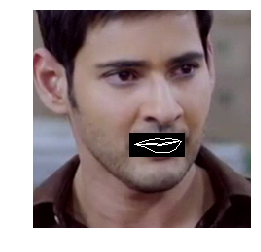

In [95]:
plt.imshow(im1_with_bmp_of_0); plt.axis('off')

In [100]:
import skimage.io
skimage.io.imsave('im1_with_bmp_of_0.png', im1_with_bmp_of_0)

In [88]:
# Using x, y from dlib and z from LS3D-W
r, Rt_0_from_1, _ = cv2.estimateAffine3D(lm1_3D[:36], lm0_3D[:36])
lm1_tx_to_0 = np.dot( Rt_0_from_1, np.hstack((lm1_2D, lm1_3D[:, 2].reshape(68, 1), np.ones((68, 1)))).T ).T.astype('int')
_, ux, uy, w = normalize_lip_landmarks(lm0_3D[48:68, :2])
lm1_tx_to_0_n = np.round(unnormalize_lip_landmarks(normalize_lip_landmarks(lm1_tx_to_0[48:68, :2])[0],
                                                   ux, uy, w)).astype(int)

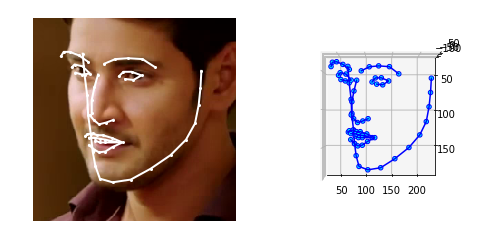

In [89]:
utils.plot_3D_landmarks(im0, lm1_tx_to_0)

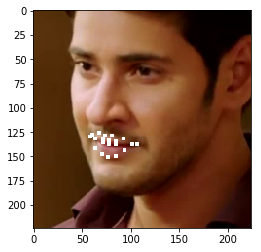

In [90]:
utils.plot_2D_landmarks(im0, lm1_tx_to_0_n)

In [91]:
im0_with_bmp_of_1 = utils.make_black_mouth_and_lips_polygons(im0, lm1_tx_to_0_n)

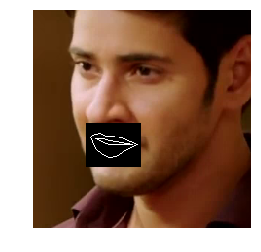

In [93]:
plt.imshow(im0_with_bmp_of_1); plt.axis('off')

In [101]:
import skimage.io
skimage.io.imsave('im0_with_bmp_of_1.png', im0_with_bmp_of_1)

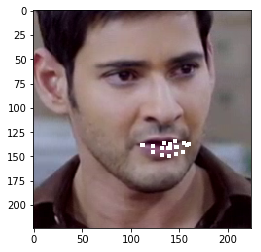

(-0.5, 223.5, 223.5, -0.5)

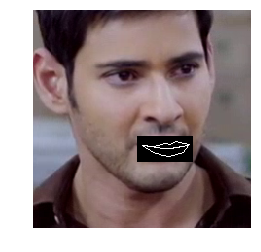

In [105]:
# Using x, y, z from LS3D-W
r, Rt_1_from_0, _ = cv2.estimateAffine3D(lm0_3D[:36], lm1_3D[:36])
lm0_tx_to_1 = np.dot( Rt_1_from_0, np.hstack((lm0_3D, np.ones((68, 1)))).T ).T.astype('int')
_, ux, uy, w = normalize_lip_landmarks(lm1_3D[48:68, :2])
lm0_tx_to_1_n = np.round(unnormalize_lip_landmarks(normalize_lip_landmarks(lm0_tx_to_1[48:68, :2])[0],
                                                   ux, uy, w)).astype(int)
utils.plot_2D_landmarks(im1, lm0_tx_to_1_n)
im1_with_bmp_of_0_3D = utils.make_black_mouth_and_lips_polygons(im1, lm0_tx_to_1_n)
plt.imshow(im1_with_bmp_of_0_3D); plt.axis('off')

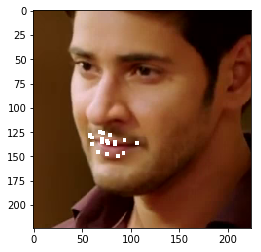

(-0.5, 223.5, 223.5, -0.5)

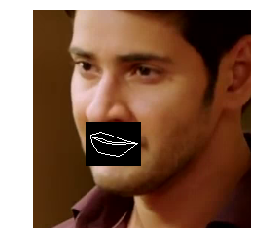

In [104]:
# Using x, y, z from LS3D-W
r, Rt_0_from_1, _ = cv2.estimateAffine3D(lm1_3D[:36], lm0_3D[:36])
lm1_tx_to_0 = np.dot( Rt_0_from_1, np.hstack((lm1_3D, np.ones((68, 1)))).T ).T.astype('int')
_, ux, uy, w = normalize_lip_landmarks(lm0_3D[48:68, :2])
lm1_tx_to_0_n = np.round(unnormalize_lip_landmarks(normalize_lip_landmarks(lm1_tx_to_0[48:68, :2])[0],
                                                   ux, uy, w)).astype(int)
utils.plot_2D_landmarks(im0, lm1_tx_to_0_n)
im0_with_bmp_of_1_3D = utils.make_black_mouth_and_lips_polygons(im0, lm1_tx_to_0_n)
plt.imshow(im0_with_bmp_of_1_3D); plt.axis('off')

# Mahesh_Babu and Mahesh_Babu_flip

In [14]:
m0 =  im0
m1 = im0[:, ::-1]

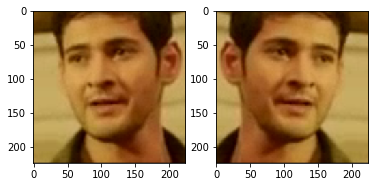

In [15]:
plt.subplot(121); plt.imshow(m0); plt.subplot(122); plt.imshow(m1)

In [16]:
def inv_lm(lm):
    new_lm = np.array(lm)
    # Jaw
    offset = 0
    count = 17
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Eyebrows
    offset = 17
    count = 10
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Eyebrows
    offset = 17
    count = 10
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Eyes
    new_lm[36] = (224 - lm[45][0], lm[45][1], lm[45][2])
    new_lm[37] = (224 - lm[44][0], lm[44][1], lm[44][2])
    new_lm[38] = (224 - lm[43][0], lm[43][1], lm[43][2])
    new_lm[39] = (224 - lm[42][0], lm[42][1], lm[42][2])
    new_lm[40] = (224 - lm[47][0], lm[47][1], lm[47][2])
    new_lm[41] = (224 - lm[46][0], lm[46][1], lm[46][2])
    new_lm[45] = (224 - lm[36][0], lm[36][1], lm[36][2])
    new_lm[44] = (224 - lm[37][0], lm[37][1], lm[37][2])
    new_lm[43] = (224 - lm[38][0], lm[38][1], lm[38][2])
    new_lm[42] = (224 - lm[39][0], lm[39][1], lm[39][2])
    new_lm[47] = (224 - lm[40][0], lm[40][1], lm[40][2])
    new_lm[46] = (224 - lm[41][0], lm[41][1], lm[41][2])
    # Nose bridge
    for i in range(27, 31):
        new_lm[i] = (224 - lm[i][0], lm[i][1], lm[i][2])
    # Nostrils
    offset = 31
    count = 5
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Mouth outer upper lip
    offset = 48
    count = 7
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Mouth outer lower lip
    offset = 55
    count = 5
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Mouth inner upper lip
    offset = 60
    count = 5
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    # Mouth inner lower lip
    offset = 65
    count = 3
    for i in range(count):
        new_lm[offset + i] = (224 - lm[offset + count-1 - i][0], lm[offset + count-1 - i][1], lm[offset + count-1 - i][2])
    return np.array(new_lm)

In [17]:
lm_m0 = lm0
lm_m1 = inv_lm(lm0)

In [18]:
lm_m0[16]

array([187,  55, -18])

In [19]:
lm_m1[0]

array([ 37,  55, -18])

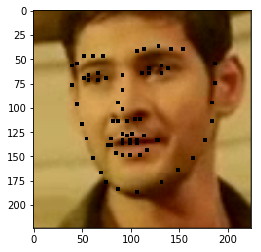

In [20]:
plot_lip_landmarks(lm_m0[:, :2], m0)

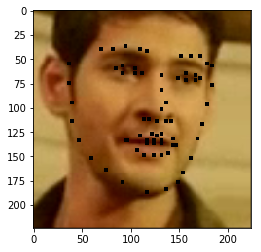

In [21]:
plot_lip_landmarks(lm_m1[:, :2], m1)

In [24]:
get_R_t(lm_m0[:, :2])[0]

array([[-3.109208  ],
       [ 0.1890751 ],
       [ 0.34380581]])

In [25]:
get_R_t(lm_m1[:, :2])[0]

array([[-3.109208  ],
       [-0.1890751 ],
       [-0.34380581]])

In [26]:
R = get_R_t(lm_m1[:, :2])[0]

### R -> 1) Pitch (x), 2) Roll (z), 3) Yaw (y)

In [66]:
lm_m1_R = np.dot(rotation_matrix_3D(0, -0.688, -0.38), lm_m1.T).T

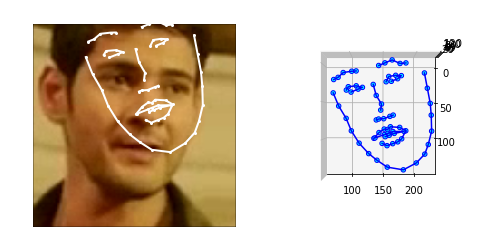

In [67]:
plot_3D_landmarks(m1, lm_m1_R)

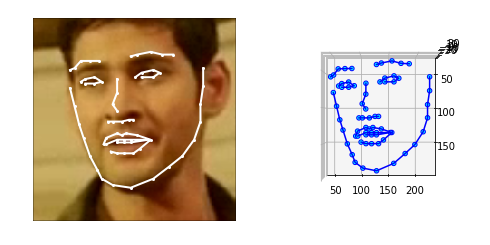

In [95]:
plot_3D_landmarks(m0, lm0)

In [96]:
lm_m0_normalized = (lm_m0 - lm_m0[30]) / np.linalg.norm(lm_m0[16] - lm_m0[0])

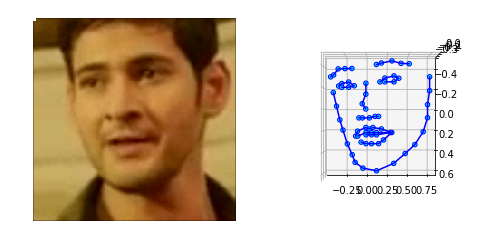

In [97]:
plot_3D_landmarks(m0, lm_m0_normalized)

In [100]:
lm_m1_normalized = (lm_m1 - lm_m1[30]) / np.linalg.norm(lm_m1[16] - lm_m1[0])

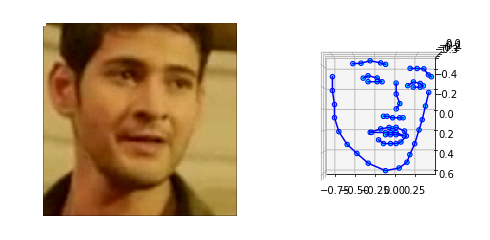

In [101]:
plot_3D_landmarks(m1, lm_m1_normalized)

# Find pose using a little help from [Satya Mallick](https://www.learnopencv.com/head-pose-estimation-using-opencv-and-dlib/), and his [other one](https://www.learnopencv.com/rotation-matrix-to-euler-angles/)

In [23]:
def get_R_t(landmarks, model_landmarks=None, size=(224, 224)):
    #2D image points. If you change the image, you need to change vector
#     image_points = np.array([
#                                 (359, 391),     # Nose tip
#                                 (399, 561),     # Chin
#                                 (337, 297),     # Left eye left corner
#                                 (513, 301),     # Right eye right corne
#                                 (345, 465),     # Left Mouth corner
#                                 (453, 469)      # Right mouth corner
#                             ], dtype="double")

    image_points = np.array([
                                landmarks[30],     # Nose tip
                                landmarks[8],     # Chin
                                landmarks[36],     # Left eye left corner
                                landmarks[45],     # Right eye right corne
                                landmarks[48],     # Left Mouth corner
                                landmarks[54]      # Right mouth corner
                            ], dtype="double")

    # 3D model points.
    if model_landmarks is not None:
        model_points = np.array([
                                    model_landmarks[30],     # Nose tip
                                    model_landmarks[8],     # Chin
                                    model_landmarks[36],     # Left eye left corner
                                    model_landmarks[45],     # Right eye right corne
                                    model_landmarks[48],     # Left Mouth corner
                                    model_landmarks[54]      # Right mouth corner

                                ], dtype="double")
    else:
        model_points = np.array([
                                    (0.0, 0.0, 0.0),             # Nose tip
                                    (0.0, -330.0, -65.0),        # Chin
                                    (-225.0, 170.0, -135.0),     # Left eye left corner
                                    (225.0, 170.0, -135.0),      # Right eye right corne
                                    (-150.0, -150.0, -125.0),    # Left Mouth corner
                                    (150.0, -150.0, -125.0)      # Right mouth corner

                                ])


    # Camera internals

    focal_length = size[1]
    center = (size[1]/2, size[0]/2)
    camera_matrix = np.array(
                             [[focal_length, 0, center[0]],
                             [0, focal_length, center[1]],
                             [0, 0, 1]], dtype = "double"
                             )

#     print "Camera Matrix :\n {0}".format(camera_matrix)

    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
    (success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)
 
    return rotation_vector, translation_vector

In [25]:
model = lm1
model_points = np.array([
                                model[30],     # Nose tip
                                model[8],     # Chin
                                model[36],     # Left eye left corner
                                model[45],     # Right eye right corne
                                model[48],     # Left Mouth corner
                                model[54]      # Right mouth corner

                            ])

In [26]:
model_points

array([[132, 109,  26],
       [139, 186,   3],
       [ 80,  78,  15],
       [167,  66,   6],
       [109, 149,  14],
       [160, 139,  10]])

In [23]:
model_points = np.array([
                                (0.0, 0.0, 0.0),             # Nose tip
                                (0.0, -330.0, -65.0),        # Chin
                                (-225.0, 170.0, -135.0),     # Left eye left corner
                                (225.0, 170.0, -135.0),      # Right eye right corne
                                (-150.0, -150.0, -125.0),    # Left Mouth corner
                                (150.0, -150.0, -125.0)      # Right mouth corner

                            ])

In [19]:
# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6


# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :

    assert(isRotationMatrix(R))
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    
    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [68]:
R0, t0 = get_R_t(lm0[:, :2], lm1)

In [69]:
R0

array([[-0.14195244],
       [-0.18918611],
       [ 0.04556233]])

In [70]:
t0

array([[-134.52624175],
       [-127.29802143],
       [ 200.70433203]])

In [36]:
lm0_R = np.dot(cv2.Rodrigues(R0)[0], lm1.T).T

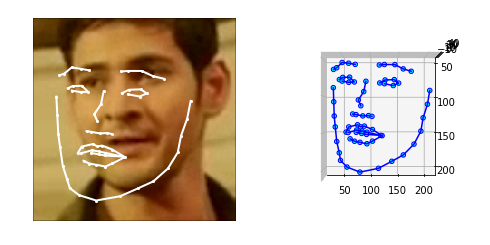

In [73]:
RRz0 = rotation_matrix_3D(0.14195244, -0.04556233, +0.18918611)
lm0_RRz0 = np.dot(RRz0, lm0.T).T
plot_3D_landmarks(im0, lm0_RRz0)

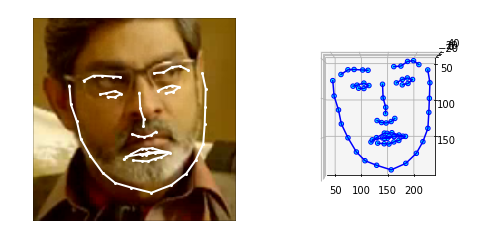

In [38]:
plot_3D_landmarks(im1, lm0_R)

### Rotation matrix of im0

In [54]:
R0, t0 = get_R_t(lm0[:, :2], im0.shape)

In [55]:
R0

array([[-3.12884182],
       [ 0.22392992],
       [ 0.50855835]])

In [56]:
t0

array([[-91.53693078],
       [-35.87277376],
       [914.75598239]])

In [57]:
R00 = cv2.Rodrigues(R0)[0]

In [58]:
R00

array([[ 0.93886672, -0.13292345, -0.31758565],
       [-0.14451051, -0.98941659, -0.01309706],
       [-0.3124836 ,  0.05819085, -0.94813914]])

In [59]:
lm0_R = np.dot(R00, lm0.T).T

ValueError: shapes (3,3) and (2,68) not aligned: 3 (dim 1) != 2 (dim 0)

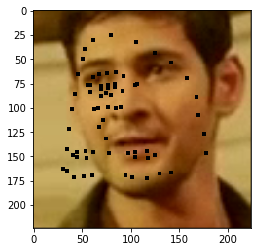

In [60]:
plot_lip_landmarks(lm0_R[:, :2], im0)

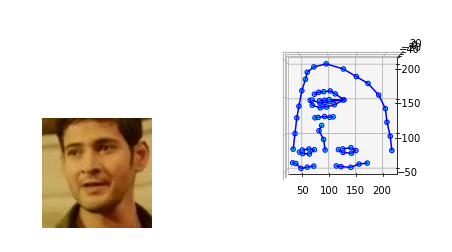

In [31]:
plot_3D_landmarks(im0, lm0_R)

WHY??????

In [32]:
lm0_RT = np.dot(R00.T, lm0.T).T

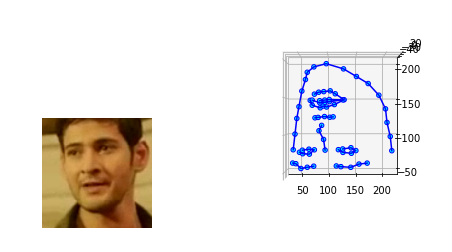

In [33]:
plot_3D_landmarks(im0, lm0_RT)

## Transform landmark points using projection matrix

In [28]:
def deg_to_rad(d):
    r = (d * np.pi / 180) % (2 * np.pi)
    if r > np.pi:
        return -(2*np.pi - r)
    else:
        return r

In [117]:
def rotation_matrix_3D(yaw, pitch, roll):
    # Pitch -> x
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(pitch), -np.sin(pitch)],
        [0, np.sin(pitch), np.cos(pitch)]
    ])
    # Yaw -> y
    Ry = np.array([
        [np.cos(yaw), 0, np.sin(yaw)],
        [0, 1, 0],
        [-np.sin(yaw), 0, np.cos(yaw)]
    ])
    # Roll -> z
    Rz = np.array([
        [np.cos(roll), -np.sin(roll), 0],
        [np.sin(roll), np.cos(roll), 0],
        [0, 0, 1]
    ])
    # YAW(PITCH(ROLL(face)))
    R = np.dot(Ry, np.dot(Rx, Rz))
    return R

In [113]:
rotation_matrix_3D(2.6, 3.2, 1)

array([[-0.53938097,  0.70478827,  0.46080545],
       [-0.84003609, -0.48830047, -0.23643608],
       [ 0.05837414, -0.51462233,  0.85542757]])

In [114]:
rotation_matrix_3D_i(2.6, 3.2, 1)

array([[-0.53938097,  0.84003609, -0.05837414],
       [-0.73730577, -0.43765747,  0.51462233],
       [ 0.40675345,  0.32061708,  0.85542757]])

### Rotation matrix of im0

In [76]:
R1, t1 = get_R_t(lm1[:, :2], im1.shape)

In [77]:
R1

array([[-3.1403452 ],
       [ 0.21167409],
       [-0.09858637]])

In [78]:
t1

array([[ 88.87423687],
       [ -9.13873827],
       [939.9690162 ]])

In [79]:
cv2.Rodrigues(R1)[0]

array([[ 0.98900306, -0.1342987 ,  0.06194197],
       [-0.13383398, -0.99093575, -0.01161029],
       [ 0.06293976,  0.00319267, -0.99801222]])

In [80]:
rotationMatrixToEulerAngles(cv2.Rodrigues(R1)[0])

array([ 3.13839364, -0.06298139, -0.13450506])

In [81]:
rotation_matrix_3D(3.13839364, -0.06298139, -0.13450506)

array([[ 0.98900306, -0.1342987 ,  0.06194197],
       [-0.13383398, -0.99093575, -0.01161028],
       [ 0.06293976,  0.00319267, -0.99801222]])

In [88]:
RR = rotation_matrix_3D(-0.2139631 , -3.1338608 , -0.13682924)

In [70]:
lm1_RR = np.dot(RR, np.hstack((lm1, np.zeros((68, 1)))).T).T

In [89]:
lm1_RR = np.dot(RR, lm1.T).T

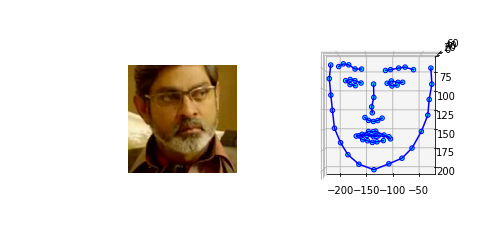

In [90]:
plot_3D_landmarks(im1, lm1_RR)

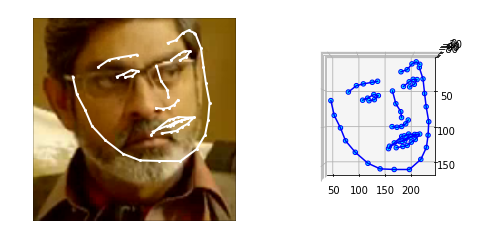

In [100]:
RRT = rotation_matrix_3D(2.96482592, 0.04430636, 0.14867311)
lm1_RRT = np.dot(RRT, lm1.T).T
plot_3D_landmarks(im1, lm1_RRT)

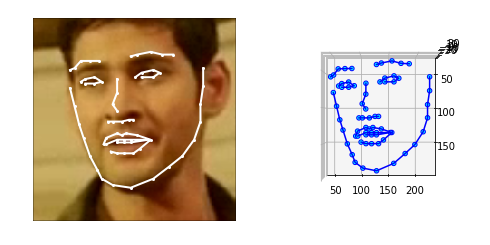

In [112]:
plot_3D_landmarks(im0, lm0)

In [91]:
rotationMatrixToEulerAngles(cv2.Rodrigues(R0)[0])

array([ 3.08029579,  0.31780644, -0.15272161])

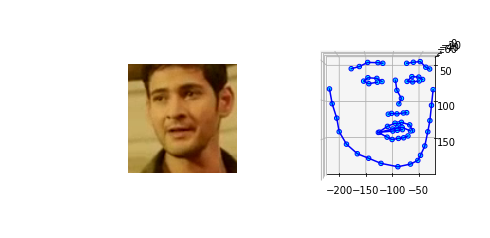

In [93]:
RR0 = rotation_matrix_3D(0.31780644, 3.08029579,  -0.15272161)
lm0_RR = np.dot(RR0, lm0.T).T
plot_3D_landmarks(im0, lm0_RR)

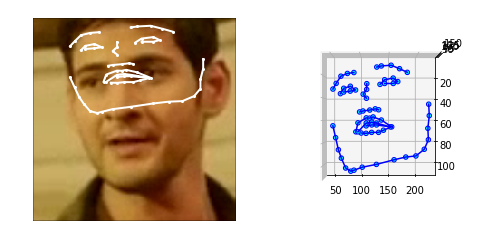

In [94]:
RRz0 = rotation_matrix_3D(1, 0, 0)
lm0_RRz0 = np.dot(RRz0, lm0.T).T
plot_3D_landmarks(im0, lm0_RRz0)

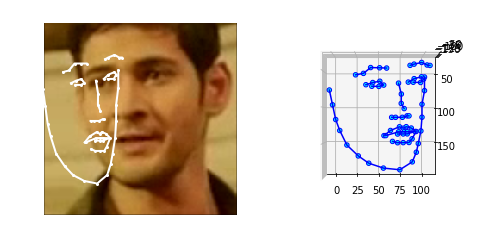

In [74]:
RRz0 = rotation_matrix_3D(0, 1, 0)
lm0_RRz0 = np.dot(RRz0, lm0.T).T
plot_3D_landmarks(im0, lm0_RRz0)

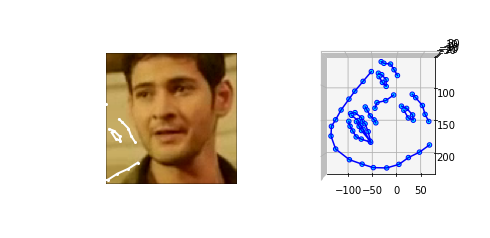

In [96]:
RRz0 = rotation_matrix_3D(0, 0, 1)
lm0_RRz0 = np.dot(RRz0, lm0.T).T
plot_3D_landmarks(im0, lm0_RRz0)

In [114]:
angles0

array([ 3.13588163,  0.21991781, -0.12210361])

[ 3.13588163  0.21991781 -0.12210361]


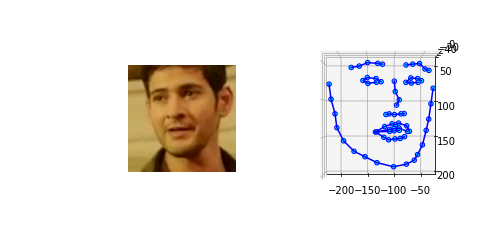

In [133]:
R0, t0 = get_R_t(lm0[:, :2], im0.shape)
angles0 = rotationMatrixToEulerAngles(cv2.Rodrigues(R0)[0])
print(angles0)
RR0 = rotation_matrix_3D(angles0[1], -angles0[0], angles0[2])
lm0_RR0 = np.dot(RR0, lm0.T).T
plot_3D_landmarks(im0, lm0_RR0)

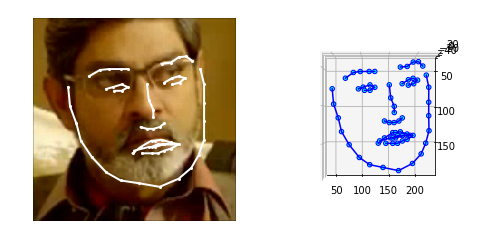

In [113]:
plot_3D_landmarks(im1, lm1)

[ 3.13839364 -0.06298139 -0.13450506]


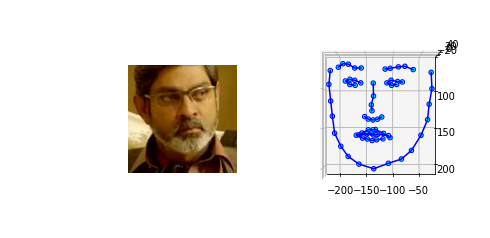

In [132]:
R1, t1 = get_R_t(lm1[:, :2], im1.shape)
angles1 = rotationMatrixToEulerAngles(cv2.Rodrigues(R1)[0])
print(angles1)
RR1 = rotation_matrix_3D(angles1[1], angles1[0], angles1[2])
lm1_RR1 = np.dot(RR1, lm1.T).T
plot_3D_landmarks(im1, lm1_RR1)

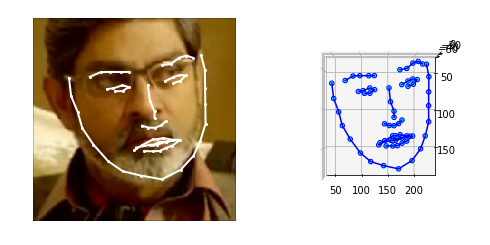

In [127]:
RR_1_0 = rotation_matrix_3D(angles1[1]-angles0[1], -angles1[0]+angles0[0], angles1[2]-angles0[2])
lm1_RR1_0 = np.dot(RR_1_0, lm1.T).T
plot_3D_landmarks(im1, lm1_RR1_0)

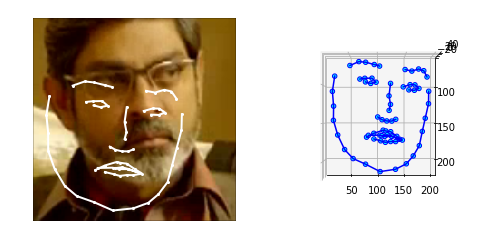

In [126]:
RR_1_0 = np.dot(rotation_matrix_3D(-angles0[1], angles0[0], -angles0[2]), rotation_matrix_3D(angles1[1], -angles1[0], angles1[2]))
lm1_RR1_0 = np.dot(RR_1_0, lm1.T).T
plot_3D_landmarks(im1, lm1_RR1_0)

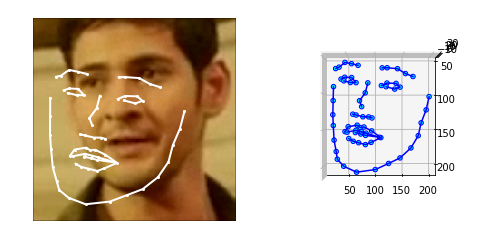

In [128]:
RR_0_1 = np.dot(rotation_matrix_3D(-angles1[1], angles1[0], -angles1[2]), rotation_matrix_3D(angles0[1], -angles0[0], angles0[2]))
lm0_RR0_1 = np.dot(RR_0_1, lm0.T).T
plot_3D_landmarks(im0, lm0_RR0_1)

## 4. Find yaw, pitch, roll

-----------> x

|

|

v

y

$Pitch$ is rotation about $x$-axis.

$Yaw$ is rotation about $y$-axis.

$Roll$ is rotation about $z$-axis.

![alt text](yaw_pitch_roll.png "Title")

In [14]:
def find_yaw_pitch_roll(img_points, obj_points=None):
    if obj_points is None:
        obj_points = np.array([[-36.9522, 39.3518, 47.1217],
                            [35.446, 38.4345, 47.6468],
                            [-0.0697709, 18.6015, 87.9695],
                            [-27.6439, -29.6388, 73.8551],
                            [28.7793, -29.2935, 72.7329],
                            [-87.2155, 15.5829, -45.1352],
                            [85.8383, 14.9023, -46.3169]
                           ], dtype=np.float32)/35.
    w = 224
    h = 224
    ppa     = (w/2., h/2.)
    fm      = 7.5/1e3
    sensor  = (7.14e-3, 5.36e-3)
    focal   = w*(fm / sensor[0])
    cam_mat = np.array( [[focal, 0, ppa[0]],
                         [0, focal, ppa[1]],
                         [0, 0, 1]], dtype = np.float64
                      )
    dist_coeffs = np.zeros((5,1))
    rvecc = np.zeros((3,1))
    tvecc = np.zeros((3,1))
    flag = cv2.SOLVEPNP_ITERATIVE # tried with SOLVEPNP_EPNP, same error.
    retval, rotation_vector, translation_vector = cv2.solvePnP(obj_points, img_points, cam_mat, dist_coeffs, rvecc, tvecc, flags=flag)
    rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
    proj_matrix = np.hstack((rvec_matrix, translation_vector))
    eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6] 
    yaw   = eulerAngles[1]
    pitch = eulerAngles[0]
    roll  = eulerAngles[2]
#     if pitch > 0:
#       pitch = 180 - pitch
#     elif pitch < 0:
#       pitch = -180 - pitch
#     yaw = -yaw
    ypr = yawpitchrolldecomposition(rvec_matrix)
    print(yaw, pitch, roll)
    print(ypr)
    return proj_matrix, yaw, pitch, roll, ypr

In [15]:
def yawpitchrolldecomposition(R):
    import math
    import numpy as np
    sin_x    = math.sqrt(R[2,0] * R[2,0] +  R[2,1] * R[2,1])    
    validity  = sin_x < 1e-6
    if R[2,1] != 0 and R[1, 2] != 0:
        z1    = math.atan2(R[2,0], R[2,1])     # around z1-axis
        x      = math.atan2(sin_x,  R[2,2])     # around x-axis
        z2    = math.atan2(R[0,2], -R[1,2])    # around z2-axis
    else: # gimbal lock
        z1    = 0                                         # around z1-axis
        x      = math.atan2(sin_x,  R[2,2])     # around x-axis
        z2    = 0                                         # around z2-axis

    return np.array([[z1], [x], [z2]])

# yawpitchroll_angles = -180*yawpitchrolldecomposition(rmat)/math.pi
# yawpitchroll_angles[0,0] = (360-yawpitchroll_angles[0,0])%360 # change rotation sense if needed, comment this line otherwise
# yawpitchroll_angles[1,0] = yawpitchroll_angles[1,0]+90

In [16]:
# Image points of im0
image_points_3D_0 = np.array([lm0[38],
                              lm0[44],
                              lm0[30],
                              lm0[48],
                              lm0[54],
                              lm0[00],
                              lm0[16]], dtype='float32')
image_points_0 = np.array(image_points_3D_0[:, :2])

In [17]:
# Image points of im0
image_points_3D_1 = np.array([lm1[38],
                              lm1[44],
                              lm1[30],
                              lm1[48],
                              lm1[54],
                              lm1[00],
                              lm1[16]], dtype='float32')
image_points_1 = np.array(image_points_3D_1[:, :2])

In [20]:
pm, y, p, r, ypr = find_yaw_pitch_roll(image_points_0, obj_points=image_points_3D_1)

[25.29999024] [-0.09336701] [176.20110076]
[[1.56734898]
 [0.44157094]
 [1.64091272]]


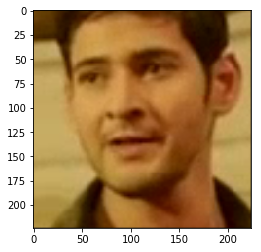

In [12]:
plt.imshow(im0)

In [16]:
proj_0, y_0, p_0, r_0, ypr = find_yaw_pitch_roll(image_points_0)

[-9.56826271] [156.34087584] [5.04331381]
[[-2.74391389]
 [ 2.69797926]
 [-2.86699182]]


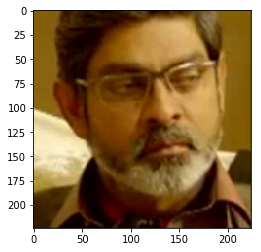

In [17]:
plt.imshow(im1)

In [18]:
proj_1, y_1, p_1, r_1, ypr_1 = find_yaw_pitch_roll(image_points_1)

[4.48701588] [150.8325035] [8.03935222]
[[2.98194645]
 [2.6270592 ]
 [2.86201834]]


In [8]:
ypr0 = [-0.0206073, -0.0520677, 0.544732]
ypr1 = [0.00631391, -0.0530485, 0.53071]

In [19]:
print(proj_1.shape, lm1.shape)

(3, 4) (68, 3)


In [20]:
lm1_proj = np.dot(proj_1, np.hstack((lm1, np.ones(len(lm1)).reshape(-1, 1))).T).T

In [21]:
proj_1

array([[ 0.98713746, -0.08436629,  0.13580122,  0.28299112],
       [-0.13942457, -0.86994945,  0.47302087, -0.81172879],
       [ 0.07823318, -0.48587065, -0.87052242,  7.9760113 ]])

In [22]:
lm1[0]

array([ 38,  76, -23])

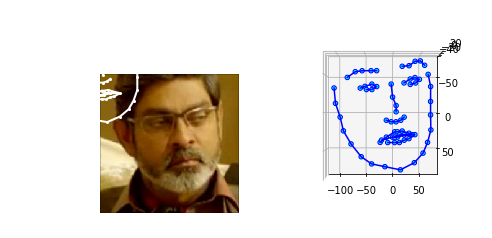

In [23]:
plot_3D_landmarks(im1, lm1-np.mean(lm1, axis=0))

![alt text](yaw_pitch_roll.png "Title")

In [ ]:
ypr

#### YAW - rotation about Y-axis

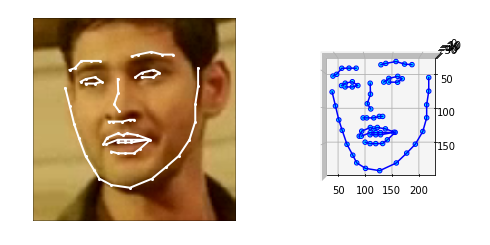

In [82]:
neg_yaw_angle = 9.56826271*np.pi/180
lm0_proj_yaw = np.dot(np.array([[ np.cos(neg_yaw_angle), 0, np.sin(neg_yaw_angle), 0], [0, 1, 0, 0], [-np.sin(neg_yaw_angle), 0, np.cos(neg_yaw_angle), 0], [0, 0, 0, 1]]), np.hstack((lm0, np.ones(len(lm0)).reshape(-1, 1))).T).T
# plot_3D_landmarks(im0, lm0_proj_yaw[:, :3])
plot_3D_landmarks(im0, lm0_proj_yaw)

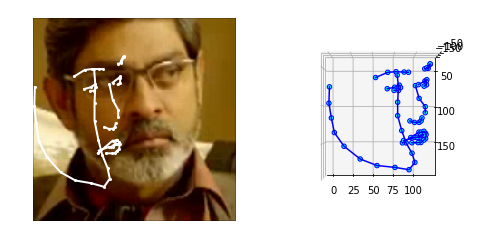

In [86]:
neg_yaw_angle = 1
lm1_proj_yaw = np.dot(np.array([[ np.cos(neg_yaw_angle), 0, np.sin(neg_yaw_angle), 0], [0, 1, 0, 0], [-np.sin(neg_yaw_angle), 0, np.cos(neg_yaw_angle), 0], [0, 0, 0, 1]]), np.hstack((lm1, np.ones(len(lm1)).reshape(-1, 1))).T).T
# plot_3D_landmarks(im1, lm1_proj_yaw[:, :3])
plot_3D_landmarks(im1, lm1_proj_yaw)

#### ROLL - rotation about Z-axis

In [73]:
neg_roll_angle = -0.123963755
lm0_proj_yaw_done = lm0_proj_yaw[:, :3]
lm0_proj_yaw_roll = np.dot(np.array([[np.cos(neg_roll_angle), np.sin(neg_roll_angle), 0, 0], [-np.sin(neg_roll_angle), np.cos(neg_roll_angle), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]), np.hstack((lm0_proj_yaw_done, np.ones(len(lm1_proj_yaw_done)).reshape(-1, 1))).T).T
plot_3D_landmarks(im0, lm0_proj_yaw_roll[:, :3])

NameError: name 'lm0_proj_yaw' is not defined

In [ ]:
neg_roll_angle = -0.123963755
lm1_proj_yaw_done = lm1_proj_yaw[:, :3]
lm1_proj_yaw_roll = np.dot(np.array([[np.cos(neg_roll_angle), np.sin(neg_roll_angle), 0, 0], [-np.sin(neg_roll_angle), np.cos(neg_roll_angle), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]), np.hstack((lm1_proj_yaw_done, np.ones(len(lm1_proj_yaw_done)).reshape(-1, 1))).T).T
plot_3D_landmarks(im1, lm1_proj_yaw_roll[:, :3])

#### PITCH - rotation about X-axis

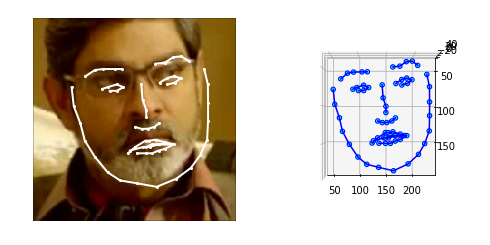

In [56]:
neg_pitch_angle = 0
lm1_proj_yaw_done = lm1_proj_yaw[:, :3]
lm1_proj_yaw_pitch = np.dot(np.array([[ 1, 0, 0, 0], [0, np.cos(neg_pitch_angle), -np.sin(neg_pitch_angle), 0], [0, np.sin(neg_pitch_angle), np.cos(neg_pitch_angle), 0], [0, 0, 0, 1]]), np.hstack((lm1_proj_yaw_done, np.ones(len(lm1_proj_yaw_done)).reshape(-1, 1))).T).T
plot_3D_landmarks(im1, lm1_proj_yaw_pitch[:, :3])

# CHECKING FACE POSE VALUES

In [ ]:
face_poses_0 = cv2.imread('/home/voletiv/Downloads/face_poses/face_poses_0.png')

## YAW

In [ ]:
# Yaw
plt.imshow(face_poses_0[:face_poses_0.shape[0]//3, :])

In [ ]:
# Split the image into the respective yaw faces
def get_breaking_points(face_poses_0):
    whites = []
    for i in range(face_poses_0.shape[1]):
        if np.all(face_poses_0[:face_poses_0.shape[0]//3, i] == 255):
                whites.append(i)

    break_points = []
    whites_range = []
    prev_whites_i = whites[0] - 1
    for i in range(len(whites)):
        if whites[i] - prev_whites_i == 1:
            whites_range.append(whites[i])
            prev_whites_i = whites[i]
        else:
            break_points.append(int(np.round(np.mean(whites_range))))
            whites_range = []
            whites_range.append(whites[i])
            prev_whites_i = whites[i]

    break_points.append(int(np.round(np.mean(whites_range))))
    
    return break_points

In [ ]:
# yaw_break_points = get_breaking_points(face_poses_0[:face_poses_0.shape[0]//3, :])
yaw_break_points = [8, 97, 174, 251, 322, 390, 466, 536, 605, 675, 748, 836]

In [ ]:
fig = plt.figure()
plt.ion()
fig.canvas.draw()
for b in range(len(yaw_break_points) - 1):
    plt.imshow(face_poses_0[:face_poses_0.shape[0]//3, yaw_break_points[b]:yaw_break_points[b+1]])
    time.sleep(.5)
    fig.canvas.draw()

In [ ]:
yaw_images_list = []
for b in range(len(yaw_break_points) - 1):
    yaw_images_list.append(face_poses_0[:face_poses_0.shape[0]//3, yaw_break_points[b]:yaw_break_points[b+1]])
#     cv2.imwrite(os.path.join('/home/voletiv/Downloads/face_poses/', 'face_poses_0_yaw_%02d.png' % b), face_poses_0[:face_poses_0.shape[0]//3, yaw_break_points[b]:yaw_break_points[b+1]])

## PITCH

In [ ]:
# pitch_break_points = get_breaking_points(face_poses_0[face_poses_0.shape[0]//3:2*face_poses_0.shape[0]//3, :])
pitch_break_points = [18, 106, 177, 248, 319, 393, 464, 532, 605, 671, 745, 830]
print(pitch_break_points)

In [ ]:
fig = plt.figure()
plt.ion()
fig.canvas.draw()
for b in range(len(pitch_break_points) - 1):
    plt.imshow(face_poses_0[face_poses_0.shape[0]//3:2*face_poses_0.shape[0]//3, pitch_break_points[b]:pitch_break_points[b+1]])
    time.sleep(.5)
    fig.canvas.draw()

In [ ]:
pitch_images_list = []
for b in range(len(pitch_break_points) - 1):
    pitch_images_list.append(face_poses_0[face_poses_0.shape[0]//3:2*face_poses_0.shape[0]//3, pitch_break_points[b]:pitch_break_points[b+1]])
#     cv2.imwrite(os.path.join('/home/voletiv/Downloads/face_poses/', 'face_poses_0_pitch_%02d.png' % b), face_poses_0[face_poses_0.shape[0]//3:2*face_poses_0.shape[0]//3, pitch_break_points[b]:pitch_break_points[b+1]] )

## ROLL

In [ ]:
# roll_break_points = get_breaking_points(face_poses_0[2*face_poses_0.shape[0]//3:, :])
roll_break_points = [2, 100, 171, 270, 334, 398, 464, 532, 606, 680, 768, 849]
print(roll_break_points)

In [ ]:
fig = plt.figure()
plt.ion()
fig.canvas.draw()
for b in range(len(roll_break_points) - 1):
    plt.imshow(face_poses_0[2*face_poses_0.shape[0]//3:, roll_break_points[b]:roll_break_points[b+1]])
    time.sleep(.5)
    fig.canvas.draw()

In [ ]:
roll_images_list = []
for b in range(len(roll_break_points) - 1):
    roll_images_list.append(face_poses_0[face_poses_0.shape[0]//3:2*face_poses_0.shape[0]//3, roll_break_points[b]:roll_break_points[b+1]])
#     cv2.imwrite(os.path.join('/home/voletiv/Downloads/face_poses/', 'face_poses_0_roll_%02d.png' % b), face_poses_0[face_poses_0.shape[0]//3:2*face_poses_0.shape[0]//3, roll_break_points[b]:roll_break_points[b+1]] )

## Check yaw

In [ ]:
yaw_ypr0 = []
yaw_ypr1 = []
yaw_lms = []
for y, yaw_image in enumerate(yaw_images_list):
    print(y)
    lm = fa.get_landmarks(yaw_image)[0]
    yaw_lms.append(lm)
    image_points = np.array([lm[38],
                             lm[44],
                             lm[30],
                             lm[48],
                             lm[54],
                             lm[00],
                             lm[16]], dtype='float32')
    image_points = np.array(image_points[:, :2])
    proj_1, y_1, p_1, r_1, ypr_1 = find_yaw_pitch_roll(image_points)
    yaw_ypr0.append([y_1, p_1, r_1])
    yaw_ypr1.append([ypr_1])

In [ ]:
fig = plt.figure()
plt.ion()
fig.canvas.draw()
for landmarks, image in zip(yaw_lms, yaw_images_list):
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(image)
    ax.plot(landmarks[0:17, 0], landmarks[0:17, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[17:22, 0], landmarks[17:22, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[22:27, 0], landmarks[22:27, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[27:31, 0], landmarks[27:31, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[31:36, 0], landmarks[31:36, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[36:42, 0], landmarks[36:42, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[42:48, 0], landmarks[42:48, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[48:60, 0], landmarks[48:60, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[60:68, 0], landmarks[60:68, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.axis('off')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.scatter(landmarks[:, 0]*1.2, landmarks[:,1], landmarks[:, 2], c="cyan", alpha=1.0, edgecolor='b')
    ax.plot3D(landmarks[:17, 0]*1.2, landmarks[:17,1], landmarks[:17,2], color='blue' )
    ax.plot3D(landmarks[17:22, 0]*1.2, landmarks[17:22, 1], landmarks[17:22, 2], color='blue')
    ax.plot3D(landmarks[22:27, 0]*1.2, landmarks[22:27, 1], landmarks[22:27, 2], color='blue')
    ax.plot3D(landmarks[27:31, 0]*1.2, landmarks[27:31, 1], landmarks[27:31, 2], color='blue')
    ax.plot3D(landmarks[31:36, 0]*1.2, landmarks[31:36, 1], landmarks[31:36, 2], color='blue')
    ax.plot3D(landmarks[36:42, 0]*1.2, landmarks[36:42, 1], landmarks[36:42, 2], color='blue')
    ax.plot3D(landmarks[42:48, 0]*1.2, landmarks[42:48, 1], landmarks[42:48, 2], color='blue')
    ax.plot3D(landmarks[48:60, 0]*1.2, landmarks[48:60, 1], landmarks[48:60, 2], color='blue' )
    ax.plot3D(landmarks[60:, 0]*1.2, landmarks[60:, 1], landmarks[60:, 2], color='blue' )
    ax.view_init(elev=90., azim=90.)
    ax.set_xlim(ax.get_xlim()[::-1])
    fig.canvas.draw()
    time.sleep(.5)

In [ ]:
yaw_ypr0 = np.array(yaw_ypr0).reshape(-1, 3)
print(yaw_ypr0)

In [ ]:
yaw_ypr1 = np.array(yaw_ypr1).reshape(-1, 3)
print(yaw_ypr1)

## Check Pitch

In [ ]:
pitch_ypr0 = []
pitch_ypr1 = []
pitch_lms = []
for p, pitch_image in enumerate(pitch_images_list):
    print(p)
    lm = fa.get_landmarks(pitch_image)
    if lm is not None:
        lm = lm[0]
        pitch_lms.append(lm)
        image_points = np.array([lm[38],
                                 lm[44],
                                 lm[30],
                                 lm[48],
                                 lm[54],
                                 lm[00],
                                 lm[16]], dtype='float32')
        image_points = np.array(image_points[:, :2])
        proj_1, y_1, p_1, r_1, ypr_1 = find_yaw_pitch_roll(image_points)
        pitch_ypr0.append([y_1, p_1, r_1])
        pitch_ypr1.append([ypr_1])

In [ ]:
pitch_ypr0 = np.array(pitch_ypr0).reshape(-1, 3)
print(pitch_ypr0)

In [ ]:
pitch_ypr1 = np.array(pitch_ypr1).reshape(-1, 3)
print(pitch_ypr1)

## Check Roll

In [ ]:
roll_ypr0 = []
roll_ypr1 = []
roll_lms = []
for p, roll_image in enumerate(roll_images_list):
    print(p)
    lm = fa.get_landmarks(roll_image)
    if lm is not None:
        lm = lm[0]
        roll_lms.append(lm)
        image_points = np.array([lm[38],
                                 lm[44],
                                 lm[30],
                                 lm[48],
                                 lm[54],
                                 lm[00],
                                 lm[16]], dtype='float32')
        image_points = np.array(image_points[:, :2])
        proj_1, y_1, p_1, r_1, ypr_1 = find_yaw_pitch_roll(image_points)
        roll_ypr0.append([y_1, p_1, r_1])
        roll_ypr1.append([ypr_1])

In [ ]:
roll_ypr0 = np.array(roll_ypr0).reshape(-1, 3)
print(roll_ypr0)

In [ ]:
roll_ypr1 = np.array(roll_ypr1).reshape(-1, 3)
print(roll_ypr1)

In [ ]:
np.round(roll_ypr0[:, 2])

In [ ]:
exp_proj_1 = np.vstack((proj_1, np.array([0, 0, 0, 1]).reshape(1, -1)))
rev_proj_1 = np.vstack((np.hstack((proj_1[:, :3].T, -proj_1[:, 3].reshape(-1, 1))), np.array([0, 0, 0, 1]).reshape(1, -1)))
print(rev_proj_1.shape)

In [ ]:
lm1_proj = np.dot(exp_proj_1, np.hstack((lm1, np.ones(len(lm1)).reshape(-1, 1))).T).T
plot_3D_landmarks(im1, lm1_proj[:, :3])

In [ ]:
lm1_proj.shape

In [ ]:
lm1_rev_proj = np.dot(rev_proj_1, np.hstack((lm1, np.ones(len(lm1)).reshape(-1, 1))).T).T
plot_3D_landmarks(im1, lm1_rev_proj)

In [ ]:
# Camera marix
camera_matrix = np.array([[20, 0, 160], [0, 20, 120], [0, 0, 1]], dtype='float64')
print(camera_matrix, camera_matrix.shape, type(camera_matrix[0][0]))

In [ ]:
# Distortion coefficients
distortion_coeffs = np.array([0, 0, 0, 0, 0]).astype('float32').reshape(-1, 1)
print(distortion_coeffs.shape, type(distortion_coeffs[0][0]))

In [ ]:
# Rotation vector
d = np.array([[1, 0, 0], [0, -1, 0,], [0, 0, -1]], dtype=('float32'))
rvec = cv2.Rodrigues(d)[0]
print(rvec, rvec.shape, type(rvec[0][0]))

In [ ]:
# Translation vector
tvec = np.array([0, 0, 1]).astype('float32').reshape(3, 1)
print(tvec, tvec.shape, type(tvec[0][0]))

In [ ]:
retval, rotation_vector, translation_vector = cv2.solvePnP(object_points, image_points_0_flip, camera_matrix, distortion_coeffs, rvec, tvec, flags=flag)
rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
proj_matrix = np.hstack((rvec_matrix, translation_vector))
eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6] 
yaw   = eulerAngles[1]
pitch = eulerAngles[0]
roll  = eulerAngles[2]
if pitch > 0:
  pitch = 180 - pitch
elif pitch < 0:
  pitch = -180 - pitch
yaw = -yaw

print(yaw, pitch, roll)

In [ ]:
# obj_pts = np.array([[10,60,0],
#                     [10,60,12.6],
#                     [24,60,0],
#                     [24,60,12.6],
#                     [24,74,0],
#                     [24,74,12.6],
#                     [47.7,70,8.8]
#                    ], dtype=np.float32)

obj_pts = np.array([[-36.9522, 39.3518, 47.1217],
                    [35.446, 38.4345, 47.6468],
                    [-0.0697709, 18.6015, 87.9695],
                    [-27.6439, -29.6388, 73.8551],
                    [28.7793, -29.2935, 72.7329],
                    [-87.2155, 15.5829, -45.1352],
                    [85.8383, 14.9023, -46.3169]
                   ], dtype=np.float32)/35.

# img_pts = np.array([[96.,  72.],
#                     [160.,  64.],
#                     [133., 112.],
#                     [109., 148.],
#                     [159., 141.],
#                     [ 38.,  76.],
#                     [186.,  55.]
#                    ], dtype=np.float32)

# img_pts = np.array([[800,970],
#                     [689,329],
#                     [1380,1175],
#                     [1363,458],
#                     [1842,881],
#                     [1875,256],
#                     [3052,852]
#                    ], dtype=np.float32)

w = 224
h = 224
ppa     = (w/2., h/2.)
fm      = 7.5/1e3
sensor  = (7.14e-3, 5.36e-3)
focal   = w*(fm / sensor[0])

cam_mat = np.array( [[focal, 0, ppa[0]],
                     [0, focal, ppa[1]],
                     [0, 0, 1]], dtype = np.float64
                  )

# cam_mat = np.array( [[20, 0, 160],
#                      [0, 20, 120],
#                      [0, 0, 1]], dtype = np.float64
#                   )
  
dist_coeffs = np.zeros((5,1))

rvecc = np.zeros((3,1))
# d = np.array([[1, 0, 0], [0, -1, 0,], [0, 0, -1]], dtype=('float32'))
# rvecc = cv2.Rodrigues(d)[0]

tvecc = np.zeros((3,1)) 
# tvecc = np.array([0., 0., 1.])

flag = cv2.SOLVEPNP_ITERATIVE # tried with SOLVEPNP_EPNP, same error.

In [ ]:
retval, rotation_vector, translation_vector = cv2.solvePnP(obj_pts, image_points_0, cam_mat, dist_coeffs, rvecc, tvecc, flags=flag)
rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
proj_matrix = np.hstack((rvec_matrix, translation_vector))
eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6] 
yaw   = eulerAngles[1]
pitch = eulerAngles[0]
roll  = eulerAngles[2]
if pitch > 0:
  pitch = 180 - pitch
elif pitch < 0:
  pitch = -180 - pitch
yaw = -yaw

print(yaw, pitch, roll)

In [ ]:
retval, rotation_vector, translation_vector = cv2.solvePnP(obj_pts, image_points_1, cam_mat, dist_coeffs, rvecc, tvecc, flags=flag)
rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
proj_matrix = np.hstack((rvec_matrix, translation_vector))
eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6] 
yaw   = eulerAngles[1]
pitch = eulerAngles[0]
roll  = eulerAngles[2]
if pitch > 0:
  pitch = 180 - pitch
elif pitch < 0:
  pitch = -180 - pitch
yaw = -yaw

print(yaw, pitch, roll)

In [ ]:
# Image points of im0
lm2 = np.array(telugu_Mahesh_Babu_landmarks[25][1:])
image_points_3D_2 = np.array([lm2[38],
                              lm2[44],
                              lm2[30],
                              lm2[48],
                              lm2[54],
                              lm2[00],
                              lm2[16]], dtype='float32')
image_points_2 = np.array(image_points_3D_2[:, :2])
print(image_points_3D_2.shape, image_points_2.shape)

In [ ]:
retval, rotation_vector, translation_vector = cv2.solvePnP(obj_pts, image_points_2, cam_mat, dist_coeffs, rvecc, tvecc, flags=flag)
rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
proj_matrix = np.hstack((rvec_matrix, translation_vector))
eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6] 
yaw   = eulerAngles[1]
pitch = eulerAngles[0]
roll  = eulerAngles[2]
if pitch > 0:
  pitch = 180 - pitch
elif pitch < 0:
  pitch = -180 - pitch
yaw = -yaw

print(yaw, pitch, roll)

In [ ]:
proj_matrix_2 = proj_matrix

### Projecting one landmark into another

In [ ]:
print(np.hstack((image_points_3D_1, np.ones(len(image_points_3D_1)).reshape(-1, 1))).shape, proj_matrix_2.T.shape)

In [ ]:
image_points_3D_1_straight = np.dot(np.hstack((image_points_3D_1, np.ones(len(image_points_3D_1)).reshape(-1, 1))), proj_matrix_2.T)

In [ ]:
image_points_3D_1_straight.shape

In [ ]:
image_points_3D_1_straight = np.array(image_points_3D_1_straight[:, :2])

In [ ]:
image_points_3D_1_straight.shape

In [ ]:
retval, rotation_vector, translation_vector = cv2.solvePnP(obj_pts, image_points_3D_1_straight, cam_mat, dist_coeffs, rvecc, tvecc, flags=flag)
rvec_matrix = cv2.Rodrigues(rotation_vector)[0]
proj_matrix = np.hstack((rvec_matrix, translation_vector))
eulerAngles = -cv2.decomposeProjectionMatrix(proj_matrix)[6] 
yaw   = eulerAngles[1]
pitch = eulerAngles[0]
roll  = eulerAngles[2]
if pitch > 0:
  pitch = 180 - pitch
elif pitch < 0:
  pitch = -180 - pitch
yaw = -yaw

print(yaw, pitch, roll)